In [ ]:
#____________________________크롤링______________________________________

In [ ]:
#유튜브 크롤링
#유튜브는 페이지가 없고, 화면 끝까지 스크롤 후 페이지의 내용을 크롤링해야 함

#body.send_key(Keys.END): 화면에 END 키를 입력(화면 스크롤)
#driver.execute_script("return document.documentElement.scrollHeight"): 현재 화면의 크기
#스크롤 키를 눌렀을 때의 화면 크기와 비교해서 화면 크기의 변화가 없으면 스크롤을 종료

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [2]:
import requests, time, re

In [3]:
driver = webdriver.Chrome("chromedriver.exe") 
driver.get("https://www.youtube.com/channel/UCyn-K7rZLXjGl7VXGweIlcA/featured") #홈페이지로 이동

In [4]:
body = driver.find_element_by_tag_name("body") #body 태그 선택
body.get_attribute("outerHTML") #바디 태그를 불러옴

'<body dir="ltr"><iframe src="https://accounts.google.com/ServiceLogin?uilel=3&amp;hl=ko&amp;service=youtube&amp;passive=true&amp;continue=https%3A%2F%2Fwww.youtube.com%2Fsignin%3Fhl%3Dko%26app%3Ddesktop%26next%3D%252Fsignin_passive%26action_handle_signin%3Dtrue%26feature%3Dpassive" style="display: none"></iframe><!-- end of chunk -->    <script>if (window.ytcsi) {window.ytcsi.tick("ai", null, \'\');}</script>\n  <ytd-app mini-guide-visible_=""><!--css-build:shady-->\n    \n    <yt-activity-manager class="style-scope ytd-app"></yt-activity-manager>\n    <yt-guide-manager id="guide-service" class="style-scope ytd-app">\n    </yt-guide-manager>\n    <yt-gfeedback-manager class="style-scope ytd-app"></yt-gfeedback-manager>\n    <yt-mdx-manager class="style-scope ytd-app"></yt-mdx-manager>\n    <yt-navigation-manager id="nav" class="style-scope ytd-app"></yt-navigation-manager>\n    <yt-network-manager id="net" class="style-scope ytd-app"></yt-network-manager>\n    <yt-playlist-manager cla

In [7]:
#채널 기본 화면에서 '동영상' 탭 클릭하기 
contents_bar = body.find_elements_by_tag_name("paper-tab")
video_tab = None

for content in contents_bar:
    if content.text == "동영상":
        video_tab = content

video_tab.click()

In [8]:
SCROLL_PAUSE_TIME = 0.5 #한 번 스크롤 후 0.5초 멈춤

#break가 실행될 때(스크롤 전후의 화면 크기가 같음)까지 반복
while True:
    last_height = driver.execute_script("return document.documentElement.scrollHeight") #현재 화면의 길이
    print("last_height: ", last_height)
    
    for i in range(10):
        body.send_keys(Keys.END) #화면 끝가지 스크롤, 화면이 길어짐
        time.sleep(SCROLL_PAUSE_TIME) #0.5초 멈춤
        
    new_height = driver.execute_script("return document.documentElement.scrollHeight") #스크롤 후 화면 길이
    print("new_height: ", new_height)
    
    if new_height == last_height: #스크롤 전후 화면 길이가 같다면
        break #반복 종료

last_height:  2358
new_height:  10868
last_height:  10868
new_height:  12168
last_height:  12168
new_height:  12168


In [9]:
#new_height 를 팝업하는 자바스크립트 
#driver.execute_script("alert(document.documentElement.scrollHeight)")

In [10]:
page = driver.page_source #페이지 소스 대입
soup = BeautifulSoup(page, "lxml") #페이지에 저장된 태그를 정리해서 리턴

In [11]:
all_videos = soup.find_all(id = "dismissable") #id 속성이 dismissable 인 객체 조회

In [12]:
title_list = []

for video in all_videos: #각 동영상 하나하나에 대해서
    title = video.find(id = "video-title") #video에서 id 속성이 video-title 속성을 갖는 객체 조회(제목)
    if len(title.text.strip()) > 0: #공백을 제거하고, 글자수가 0보다 크면
        title_list.append(title.text) #리스트에 추가 

print(len(title_list))
print(title_list)

204
['집에 손님 올 때는 이 메뉴를 해보세요. Make This Dish When You Have Guests Over!', '식당에서 먹는 닭볶음탕의 비법은 바로~ What is the secret of Dak-bokkeum-tang in a restaurant?', "장 보러 '서울중앙시장'에 다녀왔습니다! I Went to Seoul Central Market for Grocery Shopping!", '얼큰하고 매콤하게~ 밥도둑 두부조림! Hot and spicy dubujorim!', "비빔국수 만들다가 신메뉴가 탄생했습니다 '○○비빔국수' !! The Season for Bibim Guksu! Check Out This New Kind of Guksu.", '시골에서 먹는 강된장! 밥에 비벼 먹으면 끝이에요! Good Old Country Food, Gangdoenjang! Just Mix It With Rice!', '자연스러운 감칠맛의 다시마칼국수! Naturally flavorful dasima kalguksu!', '폭신~폭신한 에그 샌드위치 Soft and fluffy egg sandwich', '밖에서 사먹는 순두부찌개 맛을 집에서!! Sundubu Jjigae!, No Need to Make a Sauce Separately!', "식당에서 나오는 바로 그 '콘치즈'! Corn Cheese! A Dish of Peculiar Charm", '오트밀도 이제 맛있는 음식 입니다. (K 오트밀)', '진짜 Real!? 고구마를 넣은 고구마피자! Is it true? Sweet potato pizza with real sweet potato!', '식당에서 파는 그 닭고기 덮밥 Chicken Deopbap that is served at Restaurants!', "열무와 돼지고기를 된장으로 치치지직! 볶아내어 밥 위에 턱! 올려놓고 입안에 넣으면 아삭! 아삭! 으으으음!! 벌써 다 먹었네 '열무된장 양념덮밥'", '[Sub] 냉동만두 +

In [13]:
video_time_list = []

for video in all_videos:
    video_time = video.find("span", {"class" : "style-scope ytd-thumbnail-overlay-time-status-renderer"})
    video_time_list.append(video_time.text.strip()) #공백 제거 후 리스트에 추가
    
print(video_time_list)    

['13:41', '18:44', '6:33', '8:40', '7:31', '14:09', '12:23', '8:58', '11:42', '10:47', '16:14', '10:21', '8:21', '13:18', '6:12', '7:52', '8:50', '11:22', '9:19', '17:04', '12:44', '5:42', '13:18', '15:43', '10:04', '10:40', '12:06', '11:20', '16:58', '15:10', '11:53', '14:52', '10:04', '14:53', '11:05', '5:59', '7:39', '6:19', '5:15', '5:16', '9:26', '6:03', '7:08', '10:29', '10:40', '12:51', '12:20', '6:40', '10:29', '12:25', '11:08', '10:11', '14:51', '12:20', '9:50', '8:47', '11:22', '10:25', '13:28', '13:58', '10:44', '12:49', '11:11', '7:32', '15:16', '10:17', '8:10', '12:25', '11:38', '14:46', '5:07', '12:56', '8:30', '13:35', '14:00', '11:01', '10:28', '6:52', '16:17', '6:34', '13:10', '7:03', '7:50', '13:43', '10:05', '2:34', '16:18', '5:23', '7:31', '15:45', '3:56', '14:43', '15:51', '1:49', '6:11', '9:31', '15:34', '19:17', '14:54', '14:46', '7:36', '3:31', '16:09', '22:26', '10:11', '5:02', '12:58', '14:34', '10:10', '26:33', '10:01', '6:45', '7:32', '7:47', '7:09', '15:55'

In [14]:
video_time_seperate_list = []

for time in video_time_list:
    time_list = time.split(":") #time을 :을 기준으로 분리
    if len(time_list) < 3:
        video_time_seperate_list.append(int(time_list[0]) * 60 + int(time_list[1])) #분초
    else:
        video_time_seperate_list.append(int(time_list[0]) * 3600 + int(time_list[1]) * 60 + int(time_list[2])) #시분초
        
video_time_seperate_list

[821,
 1124,
 393,
 520,
 451,
 849,
 743,
 538,
 702,
 647,
 974,
 621,
 501,
 798,
 372,
 472,
 530,
 682,
 559,
 1024,
 764,
 342,
 798,
 943,
 604,
 640,
 726,
 680,
 1018,
 910,
 713,
 892,
 604,
 893,
 665,
 359,
 459,
 379,
 315,
 316,
 566,
 363,
 428,
 629,
 640,
 771,
 740,
 400,
 629,
 745,
 668,
 611,
 891,
 740,
 590,
 527,
 682,
 625,
 808,
 838,
 644,
 769,
 671,
 452,
 916,
 617,
 490,
 745,
 698,
 886,
 307,
 776,
 510,
 815,
 840,
 661,
 628,
 412,
 977,
 394,
 790,
 423,
 470,
 823,
 605,
 154,
 978,
 323,
 451,
 945,
 236,
 883,
 951,
 109,
 371,
 571,
 934,
 1157,
 894,
 886,
 456,
 211,
 969,
 1346,
 611,
 302,
 778,
 874,
 610,
 1593,
 601,
 405,
 452,
 467,
 429,
 955,
 878,
 664,
 629,
 896,
 1176,
 694,
 736,
 450,
 612,
 725,
 537,
 826,
 1108,
 861,
 341,
 742,
 366,
 659,
 630,
 370,
 812,
 412,
 824,
 333,
 991,
 669,
 707,
 855,
 544,
 206,
 923,
 1294,
 320,
 459,
 364,
 392,
 1069,
 603,
 375,
 477,
 618,
 142,
 538,
 607,
 420,
 361,
 467,
 254,
 755,


In [15]:
view_num_list = []
view_num_regexp = re.compile(r"조회수") #조회수를 포함하는 문자열 검색

for video in all_videos:
    view_num = video.find("span", {"class" : "style-scope ytd-grid-video-renderer"})
    
    if view_num_regexp.search(view_num.text): #조회수 문자열이 포함되어 있으면
        view_num_list.append(view_num.text) #리스트에 추가

view_num_list

['조회수 33만회',
 '조회수 55만회',
 '조회수 22만회',
 '조회수 56만회',
 '조회수 113만회',
 '조회수 35만회',
 '조회수 27만회',
 '조회수 70만회',
 '조회수 49만회',
 '조회수 98만회',
 '조회수 60만회',
 '조회수 38만회',
 '조회수 44만회',
 '조회수 24만회',
 '조회수 40만회',
 '조회수 25만회',
 '조회수 73만회',
 '조회수 24만회',
 '조회수 81만회',
 '조회수 167만회',
 '조회수 64만회',
 '조회수 27만회',
 '조회수 24만회',
 '조회수 53만회',
 '조회수 57만회',
 '조회수 137만회',
 '조회수 39만회',
 '조회수 33만회',
 '조회수 191만회',
 '조회수 39만회',
 '조회수 138만회',
 '조회수 71만회',
 '조회수 183만회',
 '조회수 99만회',
 '조회수 114만회',
 '조회수 31만회',
 '조회수 53만회',
 '조회수 60만회',
 '조회수 28만회',
 '조회수 142만회',
 '조회수 62만회',
 '조회수 184만회',
 '조회수 20만회',
 '조회수 305만회',
 '조회수 31만회',
 '조회수 19만회',
 '조회수 179만회',
 '조회수 50만회',
 '조회수 45만회',
 '조회수 168만회',
 '조회수 31만회',
 '조회수 114만회',
 '조회수 138만회',
 '조회수 34만회',
 '조회수 55만회',
 '조회수 231만회',
 '조회수 77만회',
 '조회수 84만회',
 '조회수 66만회',
 '조회수 217만회',
 '조회수 80만회',
 '조회수 121만회',
 '조회수 102만회',
 '조회수 15만회',
 '조회수 128만회',
 '조회수 60만회',
 '조회수 41만회',
 '조회수 50만회',
 '조회수 24만회',
 '조회수 50만회',
 '조회수 50만회',
 '조회수 488만회',
 '조회수 117만회',
 '조회수 53만회',
 '조회수 97만회',
 '조회

In [16]:
view_number_type_list = [] #조회수를 숫자로 변환해서 저장

for view in view_num_list:
    view = view.replace("조회수", "") #조회수 문자열 삭제
    num = float(view[:-2]) #view의 마지막 두번째 문자열까지가 숫자 - 실수로 변환
    danwee = view[-2:] #단위 대입 ex.만회, 천회
    
    if danwee == "만회":
        view_number_type_list.append(int(num * 10000))
    else:
        view_number_type_list.append(int(num * 1000))

view_number_type_list

[330000,
 550000,
 220000,
 560000,
 1130000,
 350000,
 270000,
 700000,
 490000,
 980000,
 600000,
 380000,
 440000,
 240000,
 400000,
 250000,
 730000,
 240000,
 810000,
 1670000,
 640000,
 270000,
 240000,
 530000,
 570000,
 1370000,
 390000,
 330000,
 1910000,
 390000,
 1380000,
 710000,
 1830000,
 990000,
 1140000,
 310000,
 530000,
 600000,
 280000,
 1420000,
 620000,
 1840000,
 200000,
 3050000,
 310000,
 190000,
 1790000,
 500000,
 450000,
 1680000,
 310000,
 1140000,
 1380000,
 340000,
 550000,
 2310000,
 770000,
 840000,
 660000,
 2170000,
 800000,
 1210000,
 1020000,
 150000,
 1280000,
 600000,
 410000,
 500000,
 240000,
 500000,
 500000,
 4880000,
 1170000,
 530000,
 970000,
 1290000,
 1660000,
 190000,
 870000,
 200000,
 1160000,
 520000,
 100000,
 1780000,
 530000,
 1570000,
 450000,
 250000,
 470000,
 920000,
 180000,
 1660000,
 1070000,
 73000,
 300000,
 400000,
 970000,
 4500000,
 1820000,
 990000,
 1120000,
 400000,
 1030000,
 3370000,
 890000,
 230000,
 1390000,
 560

In [17]:
#제목, 재생시간, 조회수 딕셔너리화
dict_youtube = { 
    "title" : title_list,
    "video_time" : video_time_seperate_list,
    "view_num" : view_number_type_list
}

In [18]:
import pandas as pd

In [19]:
youtube = pd.DataFrame(dict_youtube) #딕셔너리를 데이터 프레임으로 변환
youtube

,title,video_time,view_num
0,집에 손님 올 때는 이 메뉴를 해보세요. Make This Dish When You...,821,330000
1,식당에서 먹는 닭볶음탕의 비법은 바로~ What is the secret of Da...,1124,550000
2,장 보러 '서울중앙시장'에 다녀왔습니다! I Went to Seoul Central...,393,220000
3,얼큰하고 매콤하게~ 밥도둑 두부조림! Hot and spicy dubujorim!,520,560000
4,비빔국수 만들다가 신메뉴가 탄생했습니다 '○○비빔국수' !! The Season f...,451,1130000
...,...,...,...
199,[안녕하세요 백종원입니다-5] 장사이야기! 제가 정답이 아닙니다,136,330000
200,"[안녕하세요 백종원입니다-4] 제대로 된 한식 레시피, 이렇게 알리고 싶었습니다",279,520000
201,[안녕하세요 백종원입니다-3] 제 전문적 지식은 한참 아래입니다,91,500000
202,[안녕하세요 백종원입니다-2] 요리에 자신감을 드리고 싶었습니다,95,650000


In [20]:
driver.quit()

In [ ]:
#____________________________텍스트 분석______________________________________

In [25]:
!pip install konlpy

In [26]:
!pip install Twitter

In [21]:
from konlpy.tag import Twitter

In [22]:
twitter = Twitter() #문장을 단어 단위로 나누고, 단어/품사를 리턴

C:\ai\python\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [23]:
tagged = twitter.pos(youtube["title"][0]) #.pos(): 텍스트에 품사 정보를 부착해 반환
tagged

[('집', 'Noun'),
 ('에', 'Josa'),
 ('손님', 'Noun'),
 ('올', 'Verb'),
 ('때', 'Noun'),
 ('는', 'Josa'),
 ('이', 'Noun'),
 ('메뉴', 'Noun'),
 ('를', 'Josa'),
 ('해보세요', 'Verb'),
 ('.', 'Punctuation'),
 ('Make', 'Alpha'),
 ('This', 'Alpha'),
 ('Dish', 'Alpha'),
 ('When', 'Alpha'),
 ('You', 'Alpha'),
 ('Have', 'Alpha'),
 ('Guests', 'Alpha'),
 ('Over', 'Alpha'),
 ('!', 'Punctuation')]

In [24]:
tagged = twitter.pos(youtube["title"][0], stem = True) #stem = True 단어의 원형을 찾아줌
tagged

[('집', 'Noun'),
 ('에', 'Josa'),
 ('손님', 'Noun'),
 ('오다', 'Verb'),
 ('때', 'Noun'),
 ('는', 'Josa'),
 ('이', 'Noun'),
 ('메뉴', 'Noun'),
 ('를', 'Josa'),
 ('해보다', 'Verb'),
 ('.', 'Punctuation'),
 ('Make', 'Alpha'),
 ('This', 'Alpha'),
 ('Dish', 'Alpha'),
 ('When', 'Alpha'),
 ('You', 'Alpha'),
 ('Have', 'Alpha'),
 ('Guests', 'Alpha'),
 ('Over', 'Alpha'),
 ('!', 'Punctuation')]

In [27]:
for i in range(0, len(tagged)):
    if (tagged[i][1] == "Noun"): #품사가 명사인 것만 출력
        print(tagged[i])

('집', 'Noun')
('손님', 'Noun')
('때', 'Noun')
('이', 'Noun')
('메뉴', 'Noun')


In [28]:
for i in range(0, len(tagged)):
    if (tagged[i][1] == "Noun"): #품사가 명사인 것 중 단어만 출력(품사 태그 제거)
        print(tagged[i][0])

집
손님
때
이
메뉴


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name) #폰트

C:\ai\python\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ai\python\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


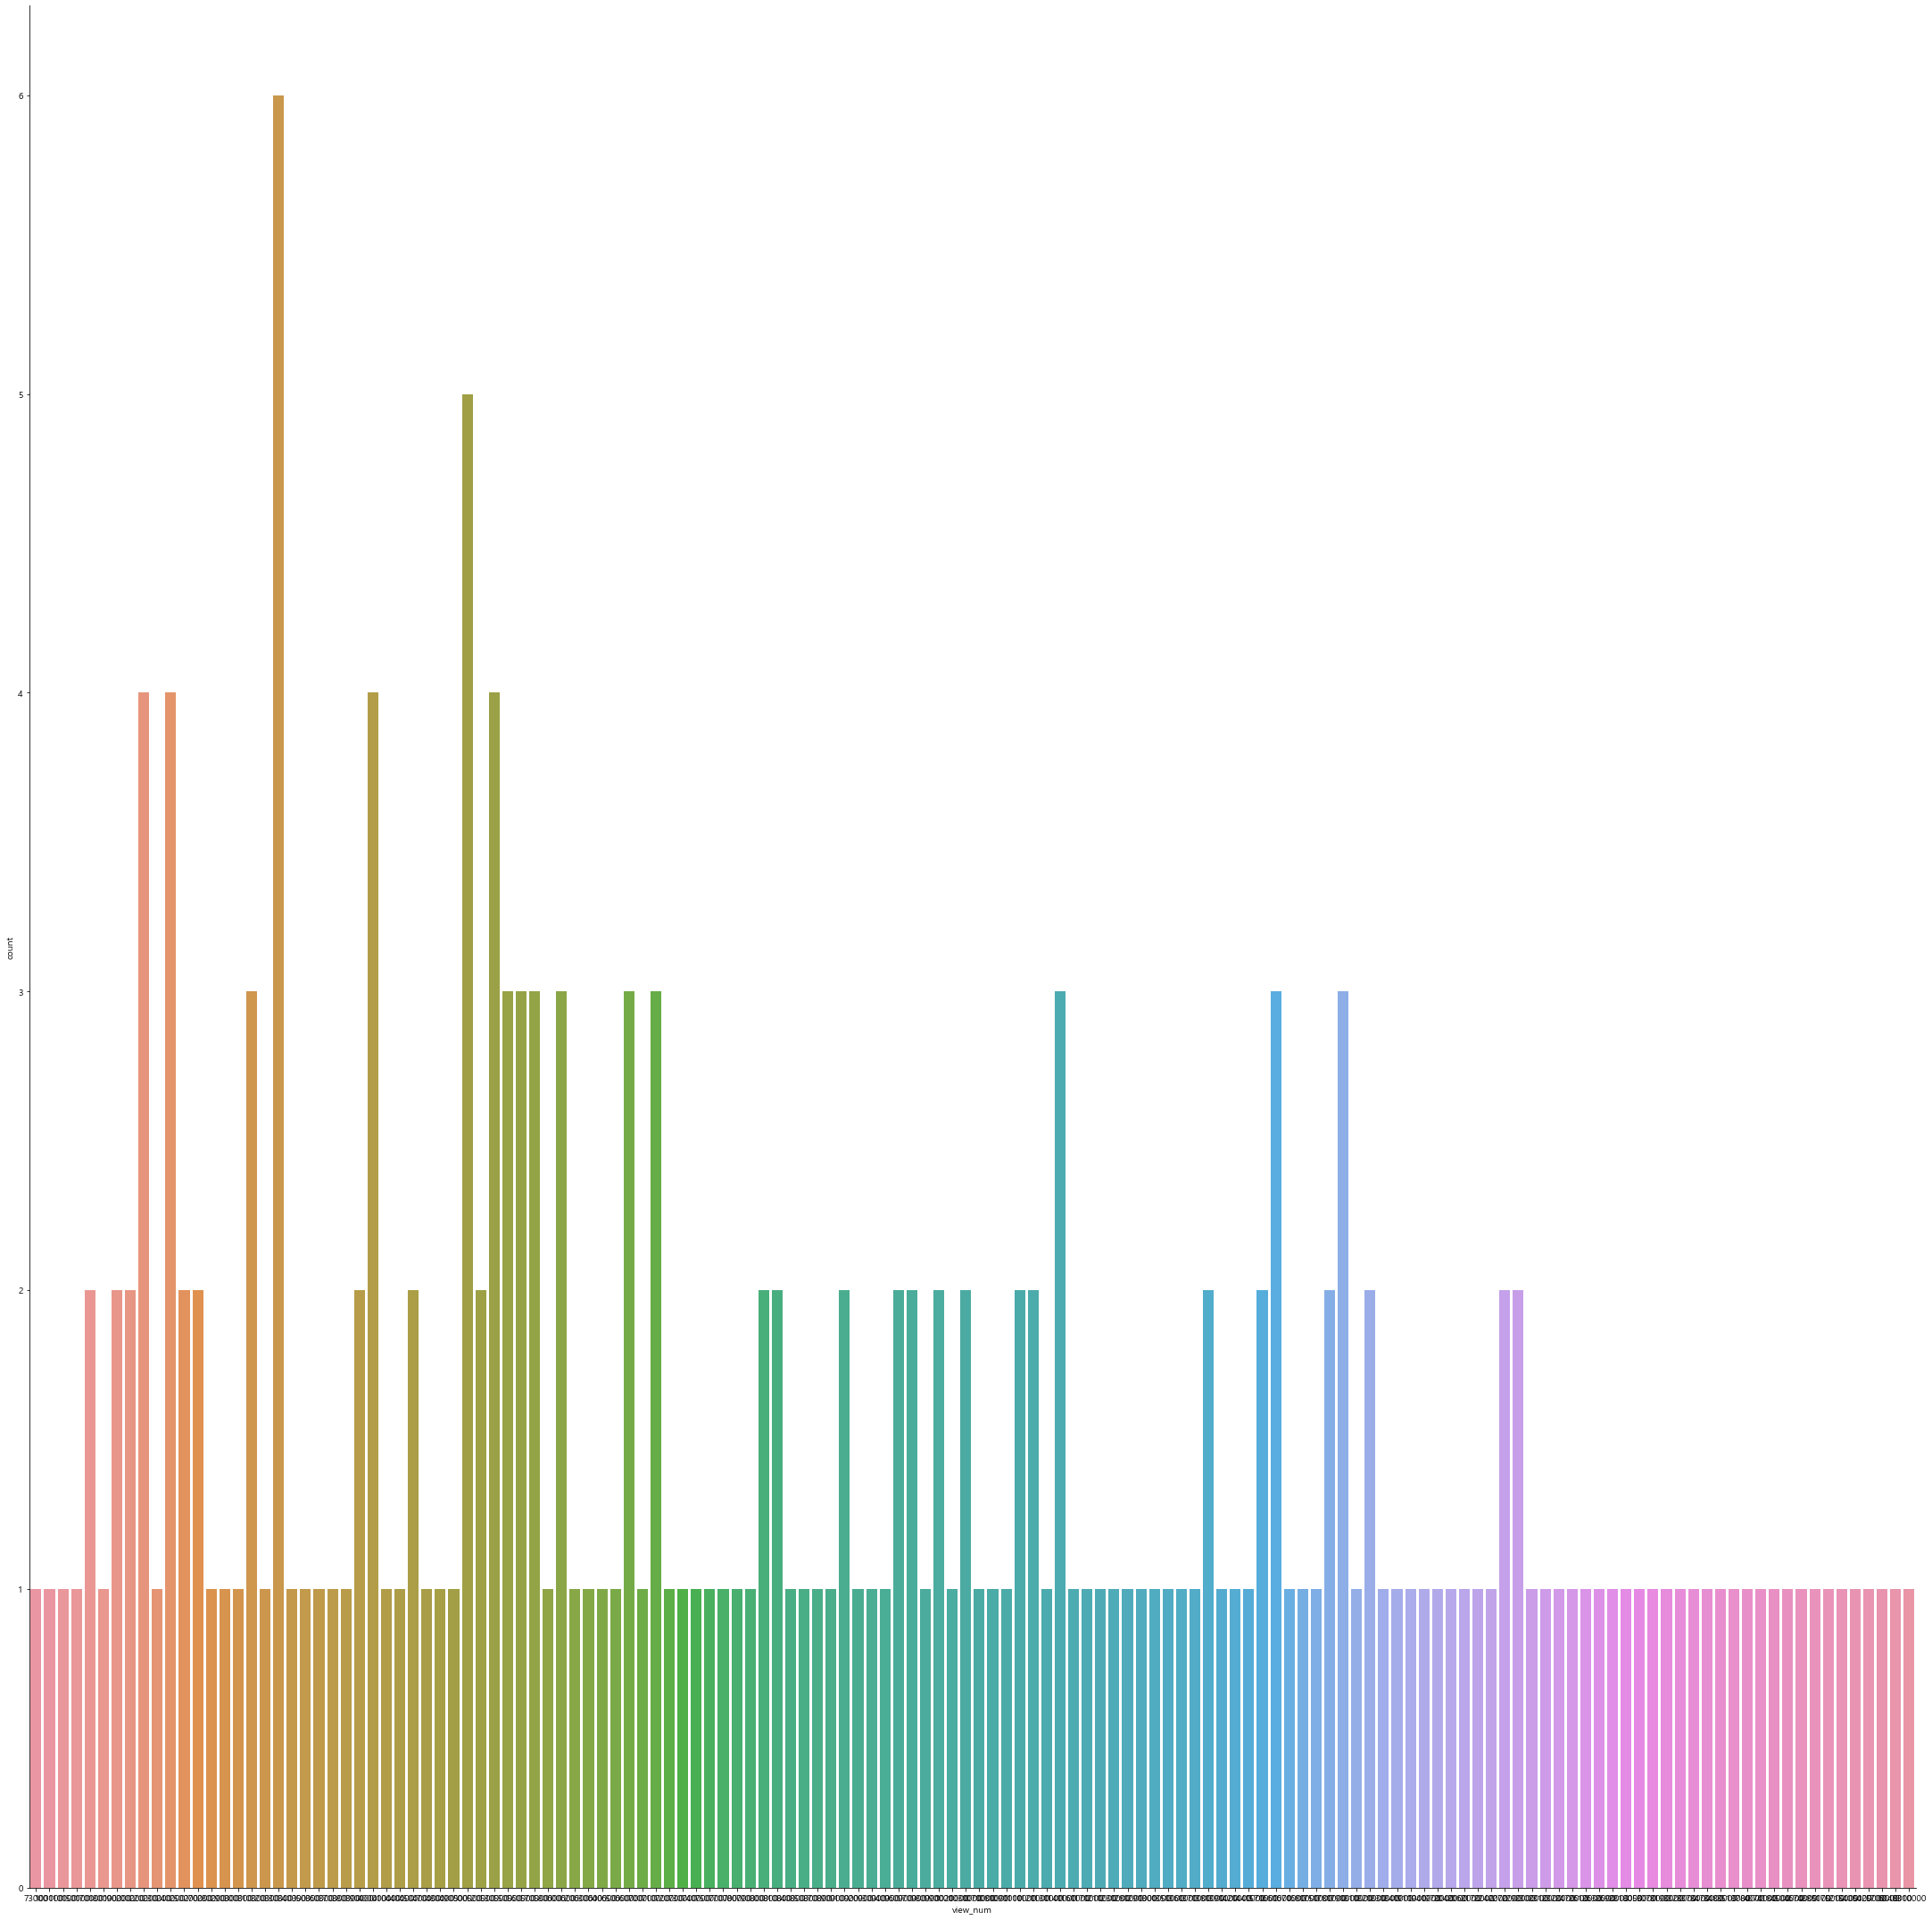

In [31]:
g = sns.factorplot("view_num", data = youtube, kind = "count", size = 30)
g.set_xlabels()

In [32]:
youtube = youtube.dropna(subset = ["view_num"]) #조회수가 null 인 줄 삭제
youtube["view_num2"] = 0 #컬럼 생성 및 초기화

In [33]:
youtube.head() #상위 5개 항목만 추출

,title,video_time,view_num,view_num2
0,집에 손님 올 때는 이 메뉴를 해보세요. Make This Dish When You...,821,330000,0
1,식당에서 먹는 닭볶음탕의 비법은 바로~ What is the secret of Da...,1124,550000,0
2,장 보러 '서울중앙시장'에 다녀왔습니다! I Went to Seoul Central...,393,220000,0
3,얼큰하고 매콤하게~ 밥도둑 두부조림! Hot and spicy dubujorim!,520,560000,0
4,비빔국수 만들다가 신메뉴가 탄생했습니다 '○○비빔국수' !! The Season f...,451,1130000,0


In [34]:
for index in range(len(youtube)):
    #youtube "view_num" 컬럼의 index번째 데이터를 view_num에 대입
    view_num = youtube["view_num"][index] 
    if(view_num < 500000):
        youtube["view_num2"][index] = 0
    elif(view_num < 1000000):
        youtube["view_num2"][index] = 1
    elif(view_num < 1500000):
        youtube["view_num2"][index] = 2
    elif(view_num < 2000000):
        youtube["view_num2"][index] = 3
    else:
        youtube["view_num2"][index] = 4

youtube.head()

C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:1

,title,video_time,view_num,view_num2
0,집에 손님 올 때는 이 메뉴를 해보세요. Make This Dish When You...,821,330000,0
1,식당에서 먹는 닭볶음탕의 비법은 바로~ What is the secret of Da...,1124,550000,1
2,장 보러 '서울중앙시장'에 다녀왔습니다! I Went to Seoul Central...,393,220000,0
3,얼큰하고 매콤하게~ 밥도둑 두부조림! Hot and spicy dubujorim!,520,560000,1
4,비빔국수 만들다가 신메뉴가 탄생했습니다 '○○비빔국수' !! The Season f...,451,1130000,2


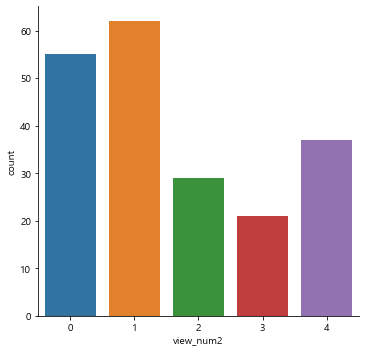

In [35]:
g = sns.factorplot("view_num2", data = youtube, kind = "count", size = 5)
g.set_xlabels()

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(youtube["title"], youtube["view_num2"])

In [38]:
X_train

53                                  바지락볶음에 막걸리를 넣어 보셨나요?
174                            맛있는 꼬막비빔밥 만들기 ㅣ 백종원의 쿠킹로그
46                                       막걸리가 생각나는 '부추전'
58                          우주대스타 '김희철!!!'님과 만드는 달래간장+밥!
167     집에서 즐기는 강식당2 니가 비비바락 국수 양념장 초간단 Ver. ㅣ 백종원의 쿠킹로그
                             ...                        
114     '쉽게 알고 덤볐는데 막상 해보니까 어려워' 그게 외식업이에요. ㅣ 백종원의 장사이야기
130    비 오는 날, 막걸리 땡기시죠? 안주로 잘 어울리는 '애호박전' 알려드릴게요.ㅣ 백...
164               강식당3의 불고기 파스타, 강불파 1인분 만들기 ㅣ 백종원의 쿠킹로그
140    '크리스피'하게 구워내고 '특급소스'와 함께 하는 '치킨 스테이크'. 사랑하는 가족...
154    '근처에 똑같은 순대국집이 생겨 매출이 떨어졌어요..' 백종원의 장사이야기 34회 ...
Name: title, Length: 153, dtype: object

In [39]:
y_train

53     0
174    4
46     3
58     1
167    4
      ..
114    0
130    2
164    4
140    4
154    1
Name: view_num2, Length: 153, dtype: int64

In [40]:
#명사와 형용사만을 리턴하는 함수
def getNounAndAdject(text): 
    stems = []
    tagged = twitter.pos(text, stem = True)
    for i in range(0, len(tagged)):
        if(tagged[i][1] == "Noun" or tagged[i][1] == "Adjective"):
            stems.append(tagged[i][0])
    return stems

In [41]:
# getNounAndAdject("아버지가 방에 들어 가신다 그래서 슬프다")

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)
#가중치 부여

#문자열의 tfidf를 계산하는 객체
vectorizer = TfidfVectorizer(min_df = 2, tokenizer = getNounAndAdject)

In [43]:
X_train_vector = vectorizer.fit_transform(X_train) #학습데이터의 tfidf
X_test_vector = vectorizer.transform(X_test) #테스트데이터의 tfidf

In [44]:
df_tfidf1 = pd.DataFrame(X_train_vector.A, columns = vectorizer.get_feature_names()) #X_train_vector를 데이터 프레임으로 변환
df_tfidf1

,가게,가족,간단,간단하다,간장,감자,강,거,건,고구마,...,편,편의점,프랜차이즈,한국,한번,한식,햄,홍합,환상,활용
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.633177,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.283591,0.0,0.000000,0.0,0.322384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.417730,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.0,0.400539,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_tfidf2 = pd.DataFrame(X_test_vector.A, columns = vectorizer.get_feature_names()) #X_test_vector를 데이터 프레임으로 변환
df_tfidf2

,가게,가족,간단,간단하다,간장,감자,강,거,건,고구마,...,편,편의점,프랜차이즈,한국,한번,한식,햄,홍합,환상,활용
0,0.00000,0.0,0.446352,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.322433
6,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
7,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
8,0.00000,0.0,0.279434,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
9,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [ ]:
#___________________________Decision Tree______________________________________

In [46]:
#모델 성능 평가
from sklearn.metrics import classification_report, confusion_matrix

#data set 분할
from sklearn.model_selection import train_test_split

#Decision Tree 알고리즘 서브 패키지
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

#IPython 내에 정보를 보여주는 도구용 공용 API
#Image : raw 데이터가 있는 PNG, JPEG 이미지 객체를 만드는 모듈
from IPython.display import Image

import pandas as pd
import numpy as np

#그래프를 생성하는 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
import pydotplus

#운영체제와 상호작용하기 위한 기본적인 기능
import os

In [47]:
df_clf = DecisionTreeClassifier()
df_clf = df_clf.fit(X_train_vector, y_train)
df_prediction = df_clf.predict(X_test_vector)

In [48]:
df_prediction

array([3, 0, 0, 0, 1, 3, 1, 0, 4, 4, 0, 1, 1, 0, 1, 2, 4, 1, 1, 1, 0, 0,
       4, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 4, 4, 0, 3, 3, 0, 4,
       4, 0, 0, 4, 1, 0, 0], dtype=int64)

In [49]:
y_test

161    4
25     2
66     0
198    1
43     4
179    2
81     1
17     0
138    4
158    4
119    2
27     0
33     1
178    3
24     1
175    4
79     0
61     2
56     1
139    0
60     1
68     0
98     3
8      0
6      0
9      1
15     0
150    0
101    0
156    1
54     1
177    4
7      1
22     0
89     1
146    1
137    1
3      1
73     1
16     1
30     2
133    1
163    0
131    2
152    4
94     0
49     3
189    4
129    1
191    4
176    2
Name: view_num2, dtype: int64

In [50]:
confusion_matrix(y_test, df_prediction) #모델 성능 평가

array([[10,  2,  1,  0,  1],
       [ 8,  5,  0,  2,  3],
       [ 3,  1,  0,  2,  1],
       [ 2,  0,  0,  0,  1],
       [ 2,  1,  1,  1,  4]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, df_prediction)
print("정확도", accuracy)

정확도 0.37254901960784315


In [52]:
from sklearn.tree import export_graphviz

export_graphviz(
    df_clf,
    out_file = "youtube_tree.dot",
    feature_names = df_tfidf1.columns,
    class_names = ["so bad", "bad", "normal", "good", "so good"],
    rounded = True,
    filled = True
)

In [53]:
# ! pip install graphviz

In [54]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

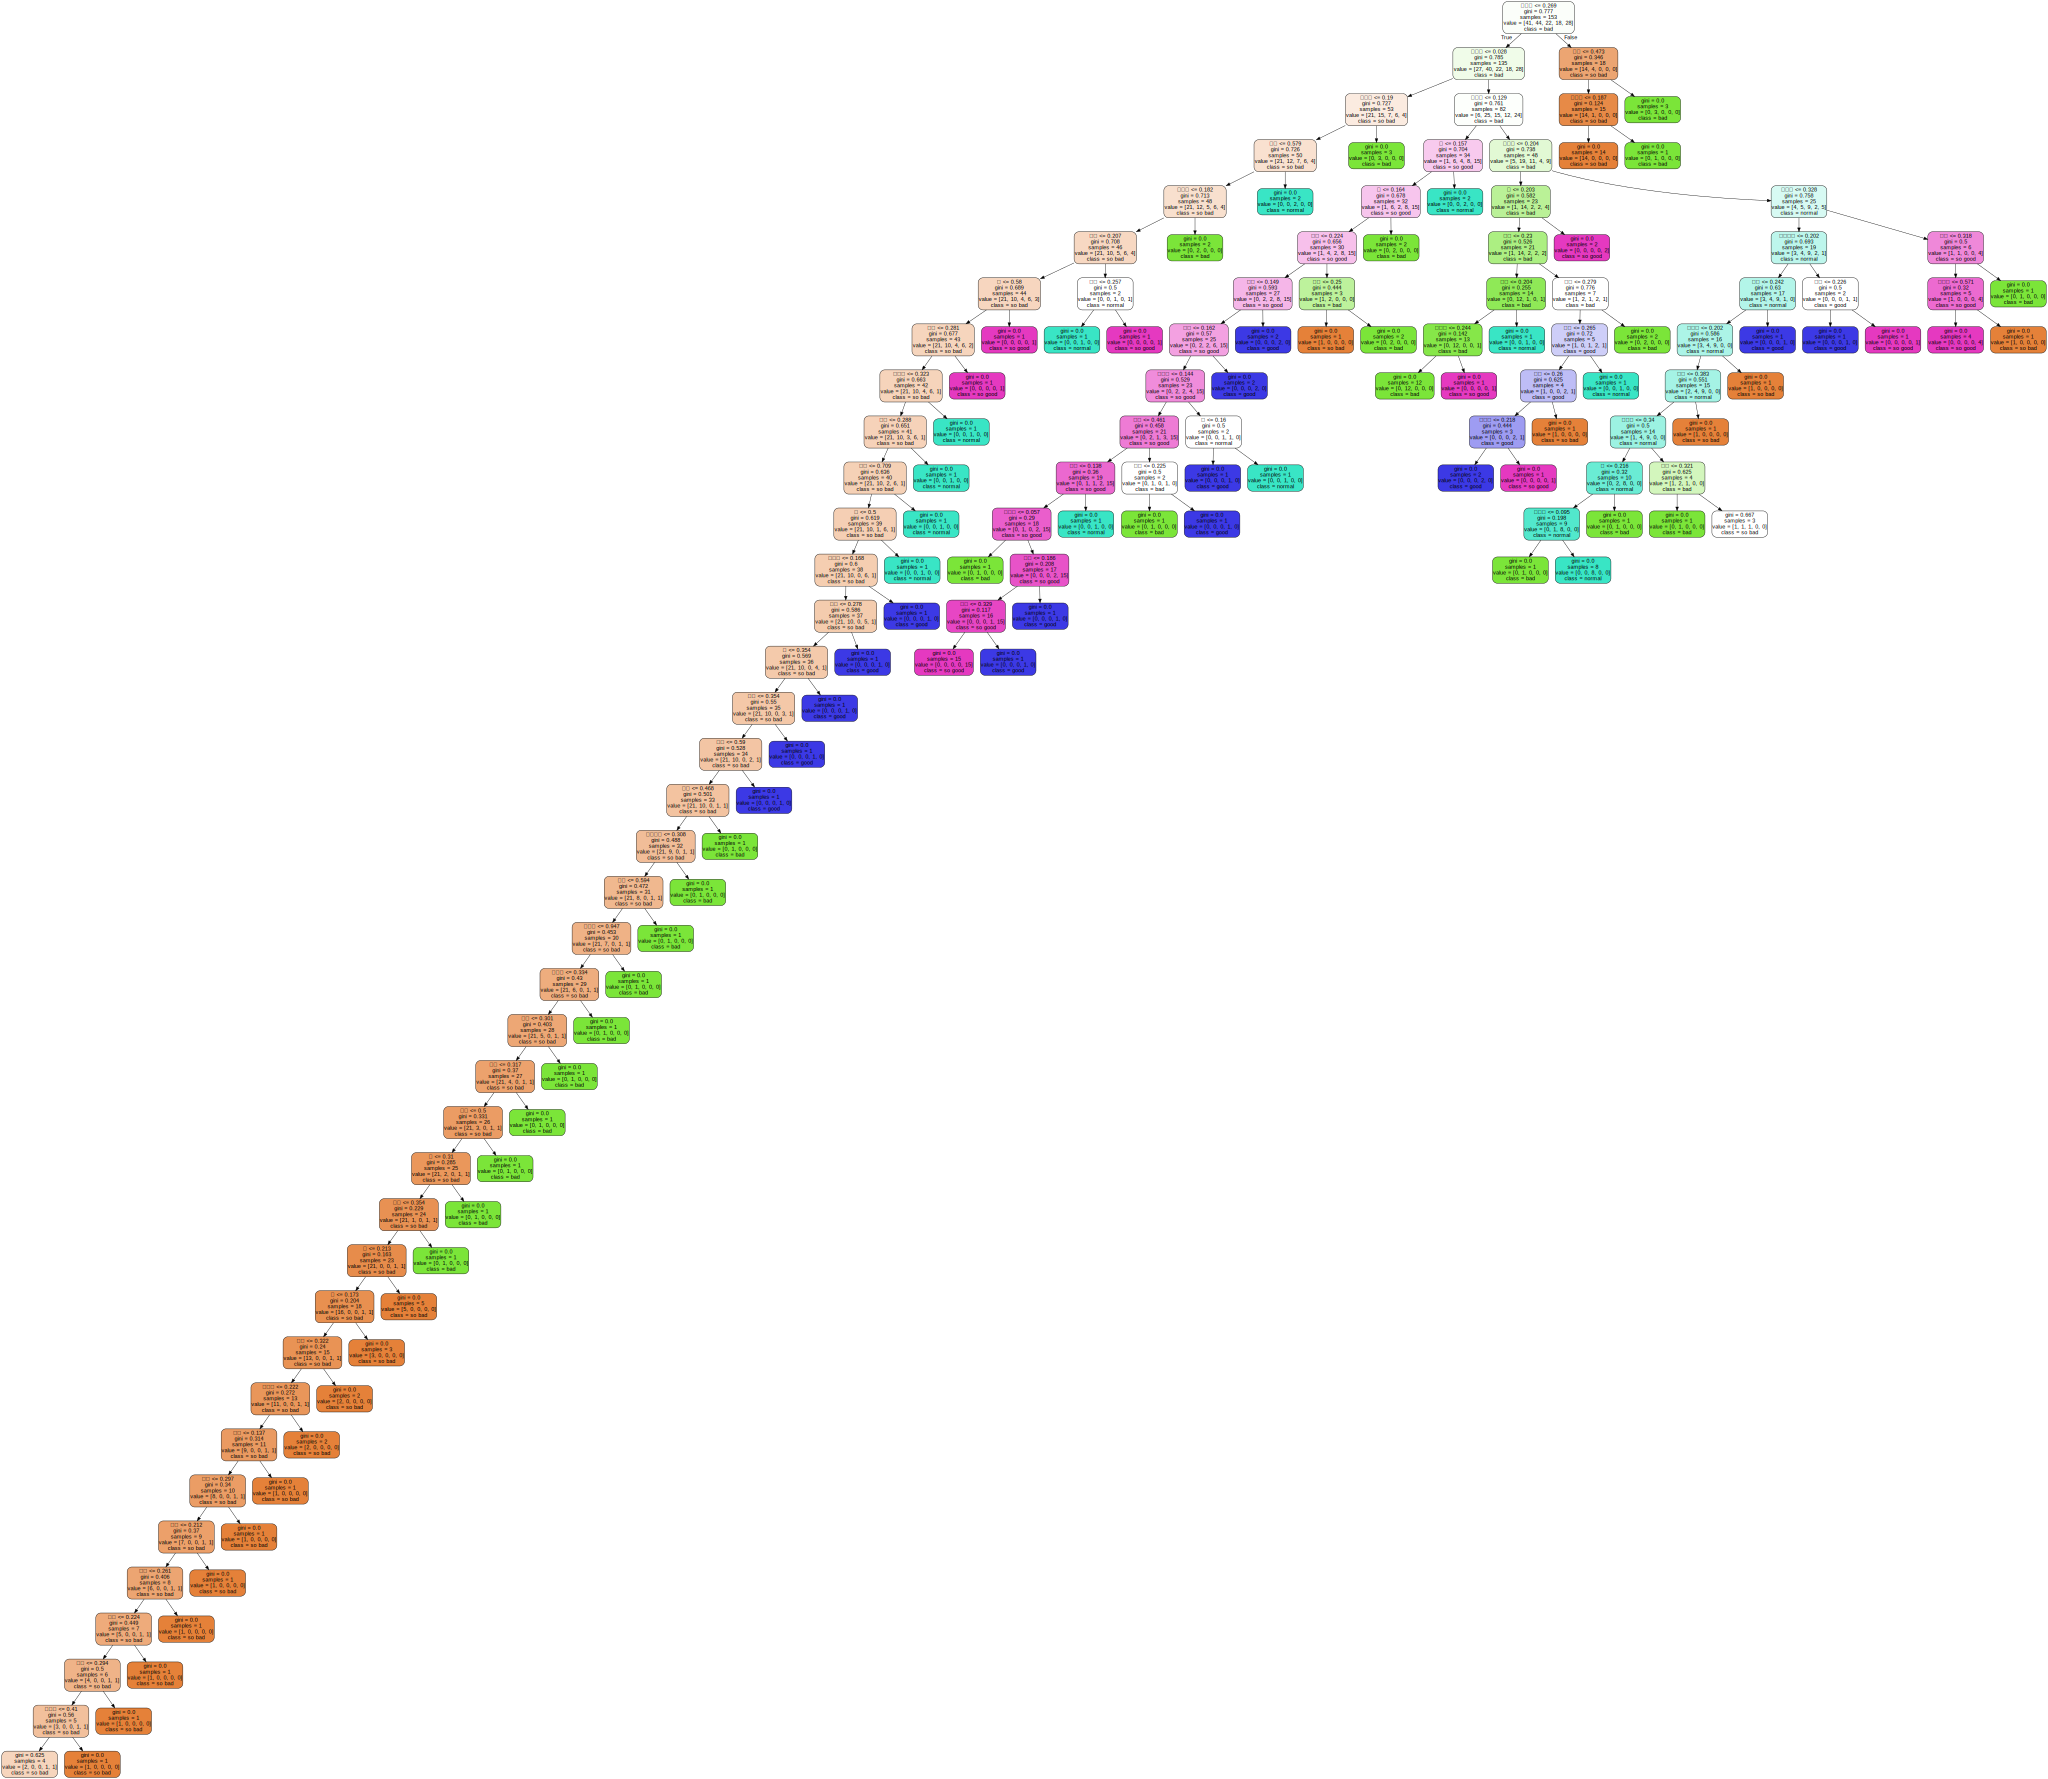

In [55]:
import graphviz

with open("youtube_tree.dot", encoding = "UTF-8") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph, encoding = "UTF-8")

dot